In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import svm, datasets

# KNN

<p>K-nearest neighbor là một trong những thuật toán supervised-learning đơn giản nhất (mà hiệu quả trong một vài trường hợp) trong Machine Learning. Khi training, thuật toán này không học một điều gì từ dữ liệu training (đây cũng là lý do thuật toán này được xếp vào loại lazy learning), mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới. K-nearest neighbor có thể áp dụng được vào cả hai loại của bài toán Supervised learning là Classification và Regression. KNN còn được gọi là một thuật toán Instance-based hay Memory-based learning.</p>

<img src="http://people.irisa.fr/Elisa.Fromont/ML/algo1_KNN.jpeg">

c:\Users\ftvde\Envs\learnML\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


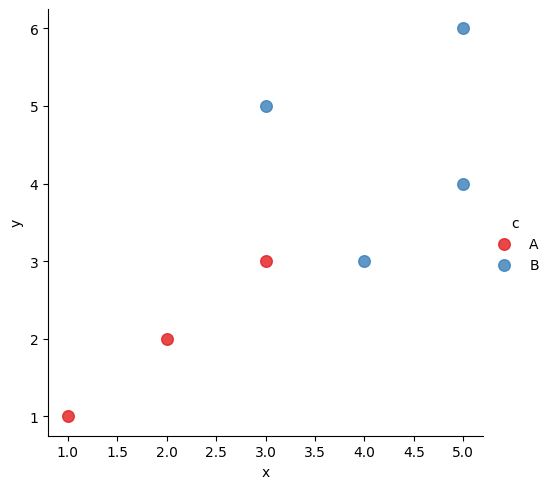

In [12]:
data = pd.read_csv("../data/knn.csv")
sns.lmplot('x', 'y', data=data,
hue='c', palette='Set1',
fit_reg=False, scatter_kws={"s": 70})
plt.show()

<p>Tính khoảng cách giữa điểm cần phân loại nhãn và điểm trong dữ liệu:</p>
<p>Một số khoảng cách như L2 (euclid), L1</p>

In [4]:
def euclidean_distance(pt1, pt2, dimension):
  distance = 0
  for x in range(dimension):
    distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance)

<p>Sau khi tính toàn bộ khoảng cách với các điểm có trong dữ liệu, tìm k điểm tương ứng với khoảng cách đến điểm hiện tại nhỏ nhất</p>
<p>Nhãn của điểm cần tìm là đa số trong k điểm chọn trên</p>

In [5]:
#---our own KNN model---
def knn(training_points, test_point, k):
  distances = {}
  #---the number of axes we are dealing with--- (column)
  dimension = test_point.shape[1]
  #--calculating euclidean distance between each
  # point in the training data and test data
  for x in range(len(training_points)):
    dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
    #---record the distance for each training points---
    distances[x] = dist[0]
  print(distances)
  #---sort the distances---
  sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
  print(sorted_d)
  #---to store the neighbors---
  neighbors = []
  #---extract the top k neighbors---
  for x in range(k):
    neighbors.append(sorted_d[x][0])
  print(neighbors)
  #---for each neighbor found, find out its class---
  class_counter = {}
  for x in range(len(neighbors)):
    #---find out the class for that particular point---
    cls = training_points.iloc[neighbors[x]][-1]
    if cls in class_counter:
      class_counter[cls] += 1
    else:
      class_counter[cls] = 1
  #---sort the class_counter in descending order---
  sorted_counter = sorted(class_counter.items(),
  key=operator.itemgetter(1),reverse=True)
  #---return the class with the most count, as well as the
  #neighbors found---
  return(sorted_counter[0][0], neighbors)

In [6]:
#---test point---
test_set = [[3,3.9]]
test = pd.DataFrame(test_set)

print(test_set)
cls,neighbors = knn(data, test, 5)
print("Predicted Class: " + cls)

[[3, 3.9]]
{0: 2.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 2.0, 6: 2.0}
[(3, 0.0), (4, 0.0), (1, 1.0), (2, 1.0), (0, 2.0), (5, 2.0), (6, 2.0)]
[3, 4, 1, 2, 0]
Predicted Class: A


<p>Thử nghiệm với nhiều giá trị k</p>

{0: 2.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 2.0, 6: 2.0}
[(3, 0.0), (4, 0.0), (1, 1.0), (2, 1.0), (0, 2.0), (5, 2.0), (6, 2.0)]
[3, 4, 1, 2, 0, 5, 6]
k =  7
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
1  2  2  A
2  4  3  B
0  1  1  A
5  5  6  B
6  5  4  B
{0: 2.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 2.0, 6: 2.0}
[(3, 0.0), (4, 0.0), (1, 1.0), (2, 1.0), (0, 2.0), (5, 2.0), (6, 2.0)]
[3, 4, 1, 2, 0]
k =  5
Class A
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
1  2  2  A
2  4  3  B
0  1  1  A
{0: 2.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 2.0, 6: 2.0}
[(3, 0.0), (4, 0.0), (1, 1.0), (2, 1.0), (0, 2.0), (5, 2.0), (6, 2.0)]
[3, 4, 1]
k =  3
Class A
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
1  2  2  A
{0: 2.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 2.0, 6: 2.0}
[(3, 0.0), (4, 0.0), (1, 1.0), (2, 1.0), (0, 2.0), (5, 2.0), (6, 2.0)]
[3]
k =  1
Class A
Neighbors
   x  y  c
3  3  3  A


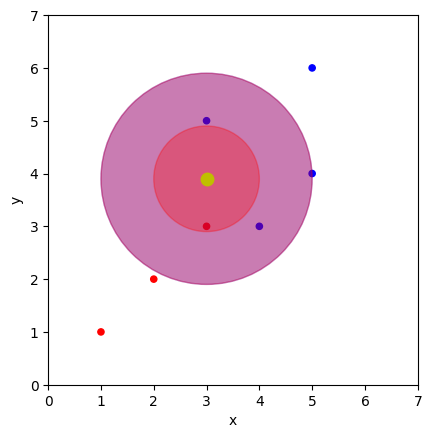

In [7]:
#---generate the color map for the scatter plot---
#---if column 'c' is A, then use Red, else use Blue---
colors = ['r' if i == 'A' else 'b' for i in data['c']]
ax = data.plot(kind='scatter', x='x', y='y', c = colors)
plt.xlim(0,7)
plt.ylim(0,7)
#---plot the test point---
plt.plot(test_set[0][0],test_set[0][1], "yo", markersize='9')
for k in range(7,0,-2):
  cls,neighbors = knn(data, test, k)
  print("============")
  print("k = ", k)
  print("Class", cls)
  print("Neighbors")
  print(data.iloc[neighbors])
  furthest_point = data.iloc[neighbors].tail(1)
  #---draw a circle connecting the test point
  #and the furthest point---
  radius = euclidean_distance(test, furthest_point.iloc[0], 2)
  #---display the circle in red if classification is A,
  # else display circle in blue---
  c = 'r' if cls=='A' else 'b'
  circle = plt.Circle((test_set[0][0], test_set[0][1]),
  radius, color=c, alpha=0.3)
  ax.add_patch(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

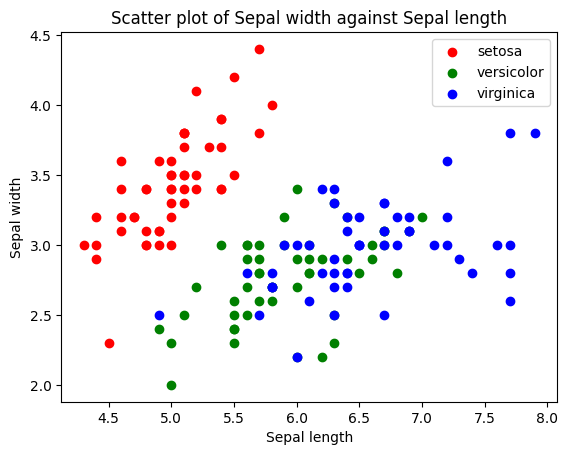

In [8]:
iris = datasets.load_iris()
X = iris.data[:, :2] # take the first two features
y = iris.target
#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

<p>Sử dụng k = 1, ta có các phân cụm cho từng loài hoa trong Iris dataset như sau</p>

(array([0, 1, 2]), array([50, 60, 40], dtype=int64))


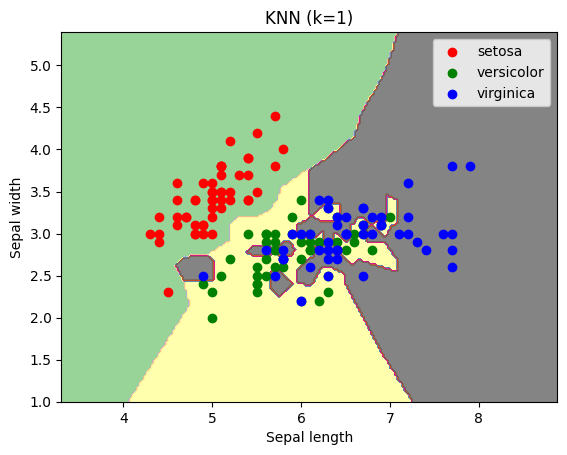

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
#---instantiate learning model---
knn = KNeighborsClassifier(n_neighbors=k)
#---fitting the model---
knn.fit(X, y)
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)
predictions = knn.predict(X)
#--classifications based on predictions---
print(np.unique(predictions, return_counts=True))

<p>Đánh giá các giá trị của k cho thuật toán sử dụng k-fold cv</p>

In [10]:
from sklearn.model_selection import cross_val_score
#---holds the cv (cross-validates) scores---
cv_scores = []
#---use all features---
X = iris.data[:, :4]
y = iris.target
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds))))
#---remove all multiples of 3---
ks = [k for k in ks if k % 3 != 0]
#---perform k-fold cross validation---
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  #---performs cross-validation and returns the average accuracy---
  scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
  mean = scores.mean()
  cv_scores.append(mean)
  print(k, mean)

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

<p>Nhận xét: Với k càng lớn, số điểm bị gán nhãn sai càng nhiều</p>

The optimal number of neighbors is 13


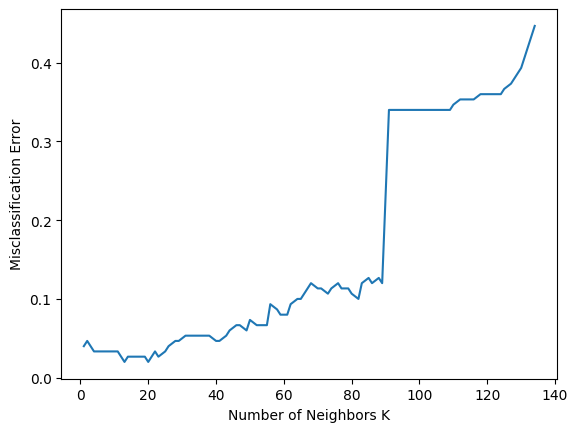

In [11]:
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]
#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()